In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from numpy import random
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sb
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

classes = [ "apple", "aquarium_fish", "baby", "bear", "beaver", "bed", "bee", "beetle", "bicycle", "bottle", "bowl", "boy", "bridge",
           "bus", "butterfly", "camel", "can", "castle", "caterpillar", "cattle", "chair","chimpanzee","clock", "cloud", "cockroach",
           "couch", "crab", "crocodile", "cup", "dinosaur", "dolphin", "elephant", "flatfish", "forest", "fox", "girl", "hamster",
           "house", "kangaroo", "keyboard", "lamp", "lawn_mower", "leopard", "lion", "lizard", "lobster", "man", "maple_tree",
           "motorcycle", "mountain", "mouse", "mushroom", "oak_tree", "orange", "orchid", "otter", "palm_tree", "pear",
           "pickup_truck", "pine_tree", "plain", "plate", "poppy", "porcupine", "possum", "rabbit", "raccoon", "ray",
           "road", "rocket", "rose", "sea", "seal", "shark", "shrew", "skunk", "skyscraper", "snail", "snake",
           "spider", "squirrel", "streetcar", "sunflower", "sweet_pepper", "table", "tank", "telephone",
           "television", "tiger", "tractor", "train", "trout", "tulip", "turtle", "wardrobe", "whale",
           "willow_tree", "wolf", "woman", "worm" ]

In [ ]:
gpus = tf.config.list_physical_devices('GPU')
print(gpus)
if gpus:
  # Restrict TensorFlow to only use the first GPU
  try:
    tf.config.set_visible_devices(gpus[0], 'GPU')
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
  except RuntimeError as e:
    # Visible devices must be set before GPUs have been initialized
    print(e)
    
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
     try:
         for gpu in gpus:
             tf.config.experimental.set_memory_growth(gpu, True)
     except RuntimeError as e:
         print(e)


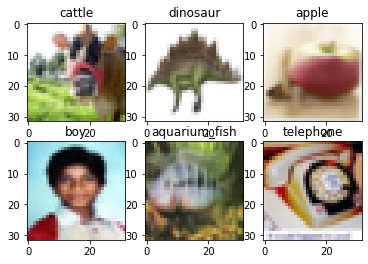

(50000, 32, 32, 3)
(50000,)
(10000, 32, 32, 3)
(10000,)


In [69]:
cifar= tf.keras.datasets.cifar100

(train_images, train_labels), (test_images, test_labels) = cifar.load_data()


train_labels = train_labels.reshape(-1,)
test_labels = test_labels.reshape(-1,)


for i in range(6):
  plt.subplot(2,3,i+1)
  plt.title(classes[train_labels[i]])
  plt.imshow(train_images[i],cmap='gray')
plt.show()

print(train_images.shape)
print(train_labels.shape)

print(test_images.shape)
print(test_labels.shape)



 
 

---


  ### Pretrained Model







In [82]:
# model = ResNet50(weights='imagenet')

model = tf.keras.models.Sequential()

model.add(tf.keras.applications.ResNet50(
    include_top=False,
    weights="imagenet",
    input_shape=(32,32,3),
    pooling='avg',
    classes=100
    ))
for layer in model.layers:
        layer.trainable=False 
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(512, activation='relu'))

model.add(tf.keras.layers.Dense(100, activation='Softmax'))

model.summary()


Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_13 (Flatten)        (None, 2048)              0         
                                                                 
 dense_26 (Dense)            (None, 512)               1049088   
                                                                 
 dense_27 (Dense)            (None, 512)               262656    
                                                                 
 dense_28 (Dense)            (None, 512)               262656    
                                                                 
 dense_29 (Dense)            (None, 100)               51300     
                                                                 
Total params: 25,213,412
Trainable params: 1,625,700


In [83]:
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
optim = tf.keras.optimizers.Adam(learning_rate=0.001)
metrics = ['accuracy']
epochs=20
batchSize=64

model.compile(loss=loss,optimizer=optim,metrics=metrics)
model.fit(train_images,train_labels,batch_size=batchSize,epochs=epochs)



Epoch 1/20
782/782 [==============================] - 9s 9ms/step - loss: 3.1011 - accuracy: 0.2408
Epoch 2/20
782/782 [==============================] - 7s 9ms/step - loss: 2.5489 - accuracy: 0.3406
Epoch 3/20
782/782 [==============================] - 7s 9ms/step - loss: 2.2859 - accuracy: 0.3970
Epoch 4/20
782/782 [==============================] - 7s 9ms/step - loss: 2.0589 - accuracy: 0.4469
Epoch 5/20
782/782 [==============================] - 7s 8ms/step - loss: 1.8388 - accuracy: 0.4944
Epoch 6/20
782/782 [==============================] - 7s 9ms/step - loss: 1.6328 - accuracy: 0.5416
Epoch 7/20
782/782 [==============================] - 7s 9ms/step - loss: 1.4226 - accuracy: 0.5949
Epoch 8/20
782/782 [==============================] - 7s 9ms/step - loss: 1.2444 - accuracy: 0.6394
Epoch 9/20
782/782 [==============================] - 7s 9ms/step - loss: 1.0793 - accuracy: 0.6820
Epoch 10/20
782/782 [==============================] - 7s 8ms/step - loss: 0.9254 - accuracy: 0.7227

In [84]:
loss, accuracy = model.evaluate(test_images,test_labels,batch_size=batchSize)
print('Accuracy : ', accuracy)

157/157 [==============================] - 2s 8ms/step - loss: 6.8206 - accuracy: 0.3281
Accuracy :  0.3280999958515167


### Predicting 

29
Prediction Class Name  :  rose
Prediction Class Label :  70
Actual Class Name  :  girl


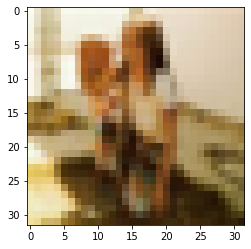

In [87]:
pred_model=tf.keras.models.Sequential()
pred_model.add(model)
pred_model.add(tf.keras.layers.Softmax())

cnt =random.randint(100)

predtions= pred_model(test_images)
pred=predtions[cnt]
# print(pred)
label= np.argmax(pred)

# print pred + Image
plt.imshow(test_images[cnt],cmap='gray')
print(label)
print("Prediction Class Name  : ",classes[test_labels[label]])
print("Prediction Class Label : ",test_labels[label])
print("Actual Class Name  : ",classes[test_labels[cnt]])


In [86]:
# cnt= random.randint(0,100)
# img = test_images[cnt]
# # img1 = tf.image.resize(img, (224,224))

# x = image.img_to_array(img)
# x1=x.copy()  # this is done to avoid error "X is read only"
# x1 = np.expand_dims(x1, axis=0)
# x1 = preprocess_input(x1)

# preds = model.predict(x1)
# # print(preds[0][0])
# print('Top 3 Values:', decode_predictions(preds, top=3)[0])
# print('Predicted :', decode_predictions(preds, top=3)[0][0][1])
# print('Actual    :',classes[test_labels[cnt]])
# plt.imshow(img,cmap='gray')

